In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('WELFake_Dataset.csv')

In [3]:
data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [4]:
data.shape

(72134, 4)

In [5]:
data.tail()

Unnamed: 0                                              title  \
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

In [6]:
data['text'][0] #real news

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [7]:
data['text'][72133]    #fake news

'Goldman Sachs Endorses Hillary Clinton For President For Goldman Sachs, was there really any other choice this cycle? | October 27, 2016 Be Sociable, Share! Lloyd Blankfein, CEO of Goldman Sachs, is greeted by Hillary Clinton at a panel discussion at the Clinton Global Initiative, Sept. 24, 2014 in New York. \nPublished in partnership with Shadowproof . \nHe’s with her. On Sunday, former Secretary of State Hillary Clinton earned the endorsement of Goldman Sachs CEO Lloyd Blankfein —an endorsement she had been working toward for years. \nAs was revealed by Wikileaks, Hillary Clinton spent the run up to her presidential campaign giving speeches to Goldman Sachs and other Wall Street banks, where she praised their talents and explained her positions on financial regulation. \nOn October 24, 2013, Clinton told Goldman Sachs that Dodd-Frank had to be done mostly for “political reasons” because Congress needed to look like it was doing something about the crisis. She said, “There’s nothing 

In [8]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
data.drop('Unnamed: 0', axis=1, inplace=True)

***Handele the null values and seperate features from the labels***

In [11]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [12]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

***Drow a pie chart for real and fake news ratio***

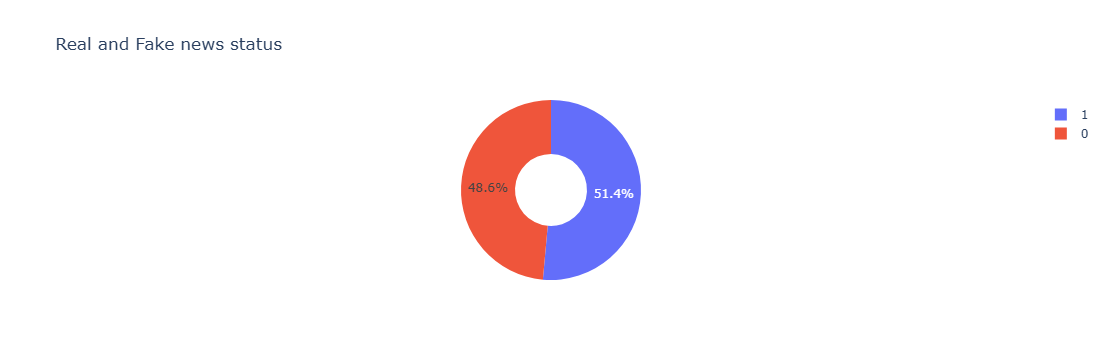

In [13]:
label_status = data['label'].value_counts()
transactions = label_status.index
quality = label_status.values

figure = px.pie(data, values = quality, names = transactions, hole= 0.40, title = 'Real and Fake news status')
figure.show()

***create word clouds***

In [14]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

<function matplotlib.pyplot.show(close=None, block=None)>

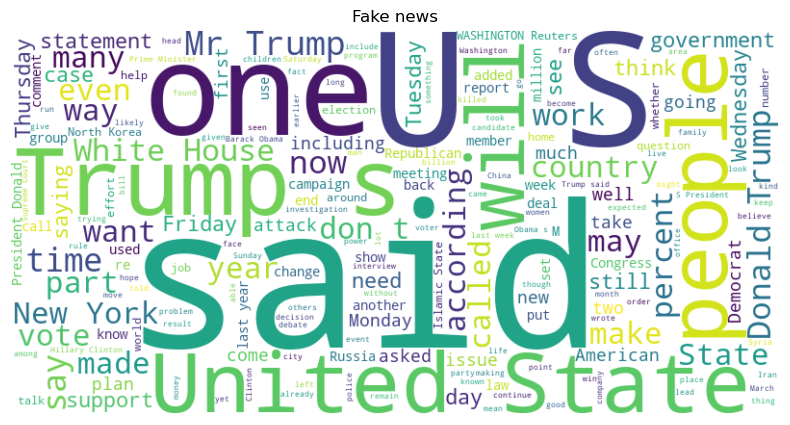

In [15]:
plot_wordcloud(fake_text, 'Fake news')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

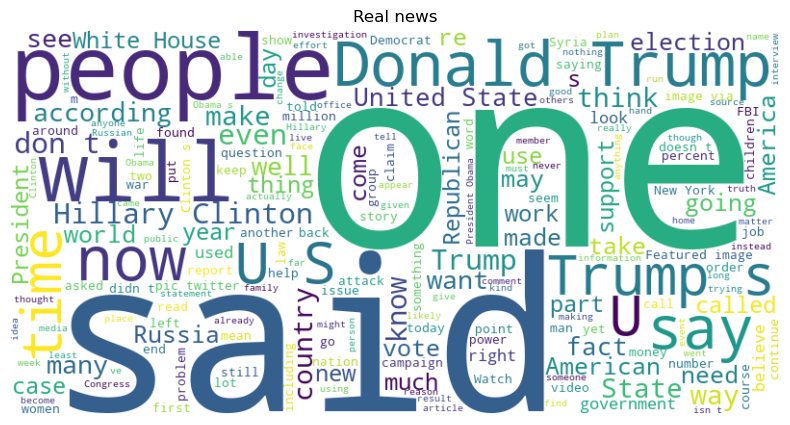

In [16]:
plot_wordcloud(real_text, 'Real news')
plt.show

***Text Preprocessing***

In [17]:
text_column = 'text'
label_column = 'label'

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def preprocess_text(text):
    #remove punctuations
    remove_pun = [char for char in text if char not in string.punctuation]
    #char joining
    clean_words = ''.join(remove_pun)
    #remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword])
    return text


In [23]:
data[text_column] = data[text_column].apply(preprocess_text)

In [24]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

***lemmatization***

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [27]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

***TF-IDF Vectorization***

In [28]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

***split dataset***

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=11)

***Evalute Naive Bayes Model***

In [30]:
def evalute_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    cm = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    return{
        'Accuracy' : accuracy,
        'Confusion Metrix' : cm
    }

In [31]:
MNB_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
MNB_model.fit(xtrain, ytrain)

MultinomialNB()

In [32]:
MNB_results = evalute_model(MNB_model, xtest, ytest)

In [33]:
MNB_results

{'Accuracy': 0.8811515179520355,
 'Confusion Metrix': array([[9709,  842],
        [1730, 9360]], dtype=int64)}

***Evalute Manually***

In [34]:
cm = confusion_matrix(ytest, MNB_model.predict(xtest))

In [35]:
cm

array([[9709,  842],
       [1730, 9360]], dtype=int64)

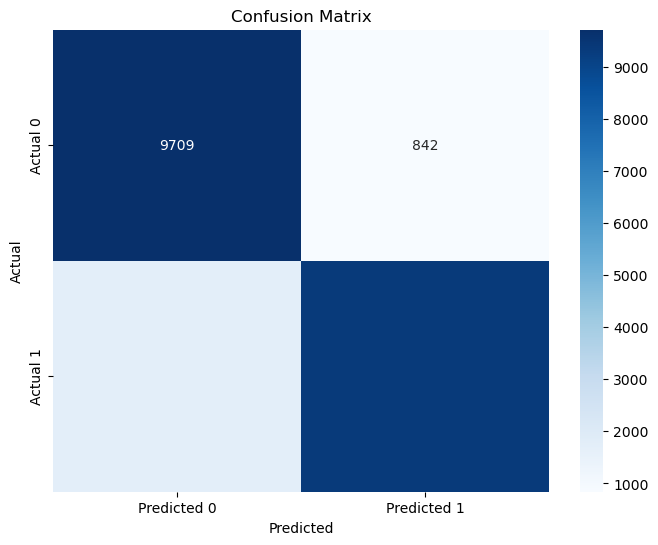

In [36]:
#create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(ytest, MNB_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10551
           1       0.92      0.84      0.88     11090

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



***Bernoulli Naive Bayes***

In [38]:
BNB_model = BernoulliNB(alpha=1.0, fit_prior=True, class_prior=None)
BNB_model.fit(xtrain, ytrain)

BernoulliNB()

In [39]:
BNB_results = evalute_model(BNB_model, xtest, ytest)

In [40]:
BNB_results

{'Accuracy': 0.8475578762534078,
 'Confusion Metrix': array([[8423, 2128],
        [1171, 9919]], dtype=int64)}

In [41]:
cm_BNB = confusion_matrix(ytest, BNB_model.predict(xtest))

In [42]:
cm_BNB

array([[8423, 2128],
       [1171, 9919]], dtype=int64)

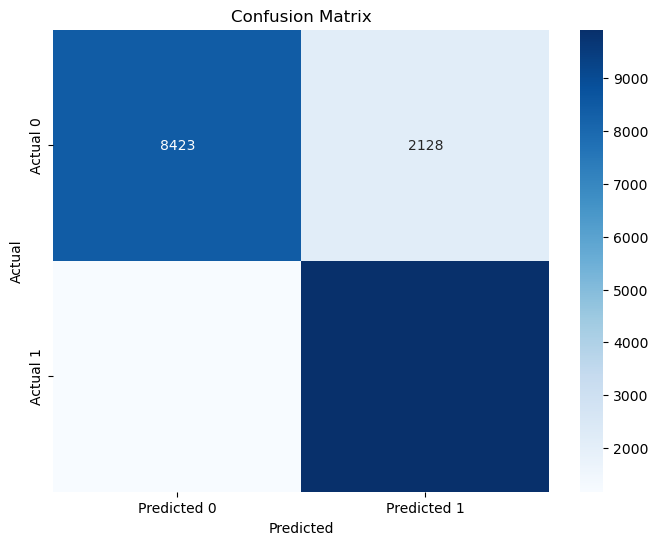

In [43]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_BNB, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***Evalute Logistic Regression***

In [44]:
lr_model = LogisticRegression()

In [45]:
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [46]:
lr_results = evalute_model(lr_model, xtest, ytest)

In [47]:
lr_results

{'Accuracy': 0.9527748255625895,
 'Confusion Metrix': array([[ 9937,   614],
        [  408, 10682]], dtype=int64)}

In [48]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))

In [49]:
cm_lr

array([[ 9937,   614],
       [  408, 10682]], dtype=int64)

In [50]:
lr_model.score(xtest, ytest)

0.9527748255625895

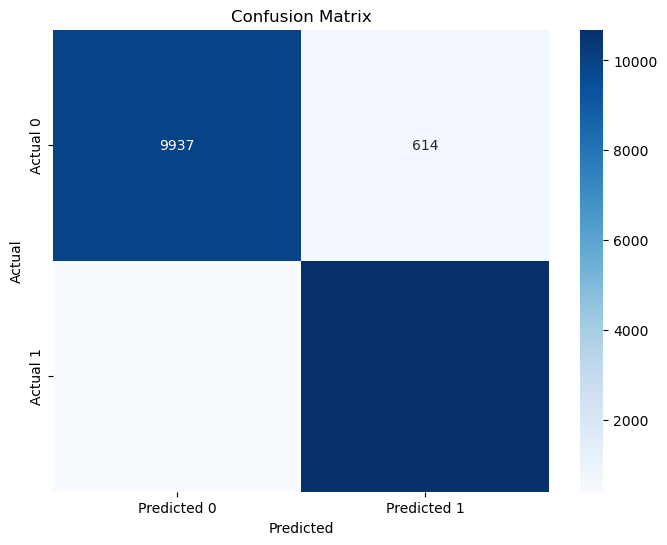

In [51]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

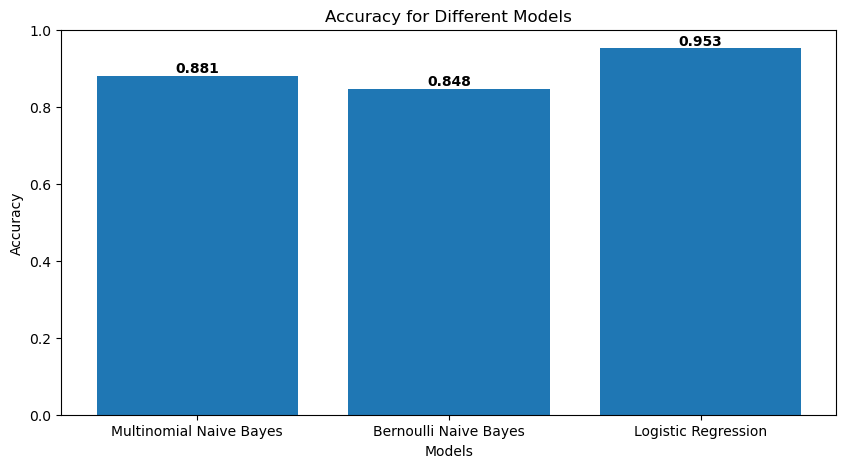

In [52]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [MNB_results['Accuracy'], BNB_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

In [53]:
models = [MNB_model, BNB_model, lr_model]

In [54]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation 
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

 No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [55]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 283 stored elements in Compressed Sparse Row format>

In [56]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [57]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Model: MultinomialNB
Prediction: [1]


Model: BernoulliNB
Prediction: [1]


Model: LogisticRegression
Prediction: [1]


